#### Maestría en Inteligencia Artificial y Analítica de Datos

## Programación para Analítica Descriptiva y Predictiva - Marzo 2025
## Práctica #23: Regresión Ridge y Lasso
---


## Datos del Estudiante

## Autor: [Antonio Calzadilla Miranda]
## Matrícula: [263861]

### **Instrucciones y Objetivos para la Práctica: Regresión Lasso y Ridge**

#### **📌 Objetivos de la Práctica:**  
Al finalizar esta práctica, los estudiantes serán capaces de:  
1. **Realizar un Análisis Exploratorio de Datos (EDA)** completo, incluyendo visualización de distribuciones, detección de outliers y análisis de correlaciones.  
2. **Preprocesar datos** correctamente, manejando valores faltantes, codificando variables categóricas y escalando características.  
3. **Implementar modelos de regresión Lasso y Ridge**, entendiendo cómo la regularización afecta los coeficientes.  
4. **Verificar los supuestos de la regresión lineal** (linealidad, normalidad de residuos, homocedasticidad y multicolinealidad).  
5. **Comparar el rendimiento** de ambos modelos y analizar qué variables son más relevantes en cada caso.  

---

### **📋 Instrucciones**  

#### **🔹 Paso 1: Configuración Inicial**
✅ Carga el set de datos que puedes encontrar en el campus virtual
✅ Ejecutar las celdas de importación de librerías y carga del dataset.  
✅ Familiarizarse con los datos usando `.head()`, `.info()` y `.describe()`.

In [ ]:
# Escribe tu código aquí
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Tu código aquí
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Bibliotecas para modelado
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats


# Cargar el dataset desde una URL pública y confiable
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Programacion /Semana 15 10192025/insurance.csv')
print(df.head())


   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [ ]:
print(df.describe())

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


In [ ]:
# Convert the 'sex' column to category type
df['sex'] = df['sex'].astype('category')
# Convert the 'smoker' column to category type
df['smoker'] = df['smoker'].astype('category')
# Convert the 'region' column to category type
df['region'] = df['region'].astype('category')
# Convert the 'children' column to category type
df['children'] = df['children'].astype('category')


Si una variable numérica (tipo int) tiene menos de 10-15 valores únicos (como children que tiene 6), casi siempre es mejor investigarla y considerar tratarla como categórica.

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   category
 4   smoker    1338 non-null   category
 5   region    1338 non-null   category
 6   charges   1338 non-null   float64 
dtypes: category(4), float64(2), int64(1)
memory usage: 37.4 KB
None


El archivo tiene 7 variables de las cuales cuatro son numericas y tres son categoricas. En total tiene 1338 observaciones, ninguna variable tiene datos faltantes.

La variable objetivo del proyecto es la columna **charges** la cual es numerica y se buscara predecir usando el resto de las variables del dataset.


Age: The age of the primary policyholder.Sex: The gender of the policyholder.

BMI: A measure of body fat based on height and weight (e.g., kg/m\({}^{2}\)).

Adult BMI ranges are:

underweight (below 18.5),

healthy weight (18.5–24.9),

overweight (25.0–29.9),

and obesity (30.0 or greater).

Children: The number of children covered by the insurance policy.

Smoker: A binary indicator (yes/no) of whether the person smokes.

Region: The beneficiary's residential area, typically categorized into U.S. regions.

Charges: The medical insurance cost billed to the individual, which is the target variable for prediction models.

#### **🔹 Paso 2: Análisis Exploratorio (EDA)**  
📊 **Para variables numéricas:**  
- Generar histogramas y boxplots para identificar distribuciones y outliers.  
- Calcular medidas de tendencia central y dispersión.  

📊 **Para variables categóricas:**  
- Usar gráficos de barras para visualizar frecuencias.    



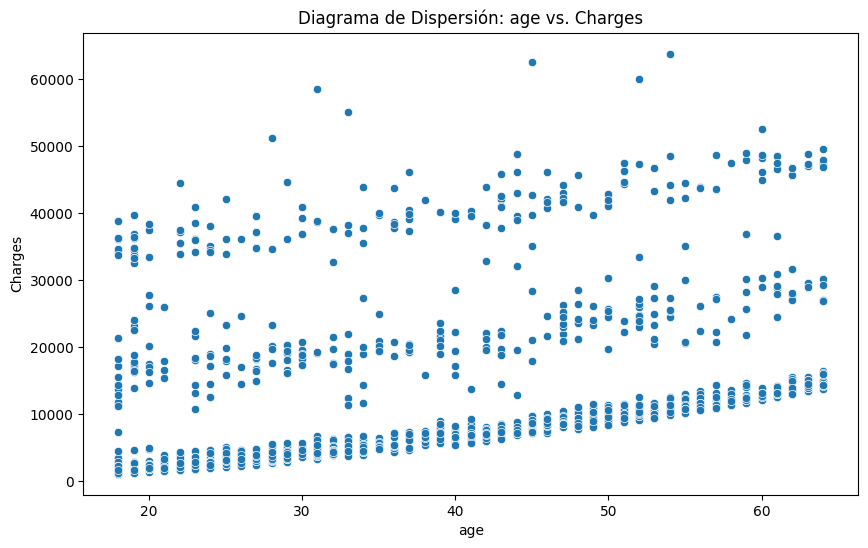

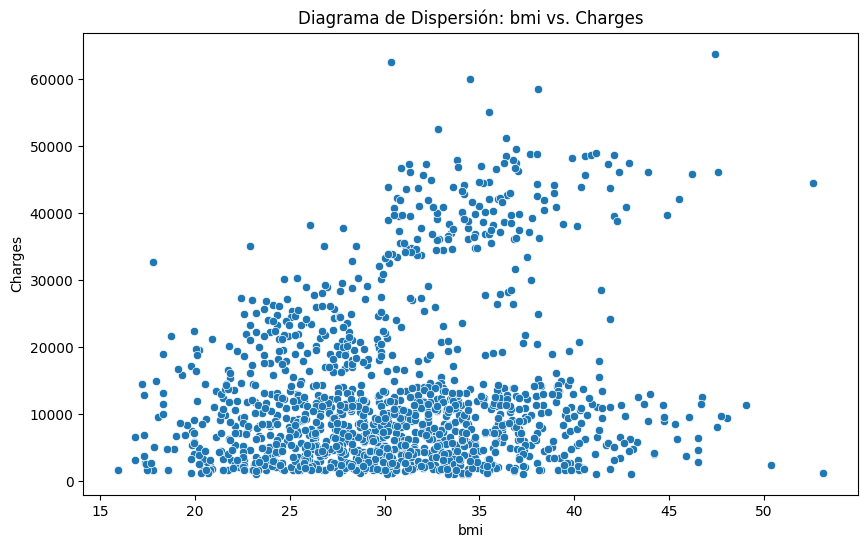

In [ ]:
# Select numerical columns excluding the target variable 'charges'
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
numerical_cols.remove('charges')

# Generate scatter plots for each numerical variable against 'charges'
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x=col, y='charges')
    plt.title(f'Diagrama de Dispersión: {col} vs. Charges')
    plt.xlabel(col)
    plt.ylabel('Charges')
    plt.show()

En los diagramas de dispersion de las variables numericas es posible observar los siguientes detalles al momento que se comparan con la variable objetivo **charges**:

age vs charges - se puede observar una relacion positiva, cuando incrementa la edad tambien aumenta el costo de la cobertura del seguro.

bmi vs charges - de manera global se observa que el grueso de la poblacion pago del seguro paga menor a $15,000 en tanto que se observa un ligero crecimiento cuando la poblacion tiene un bmi mayor a 20 a 35 el costo del seguro tambien aumenta.

children vs charges - Se observa que la poblacion con el menor numero de ninos es la que mas paga en temas de seguros tanto que las familias con varios ninos en casa contratan menos seguros medicos y/o eligen opciones de cobertura mas economicas.

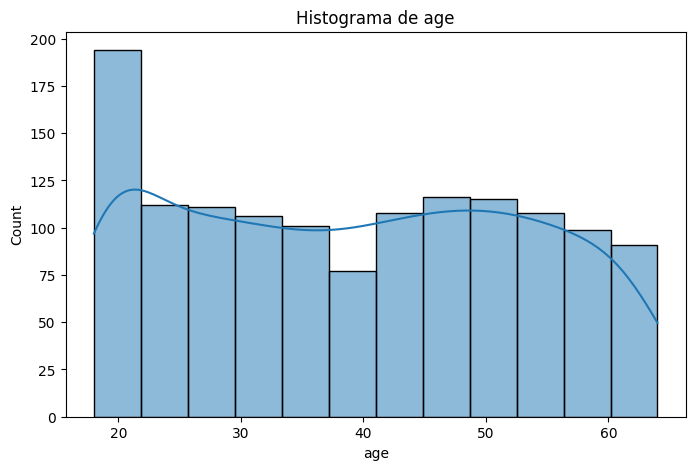

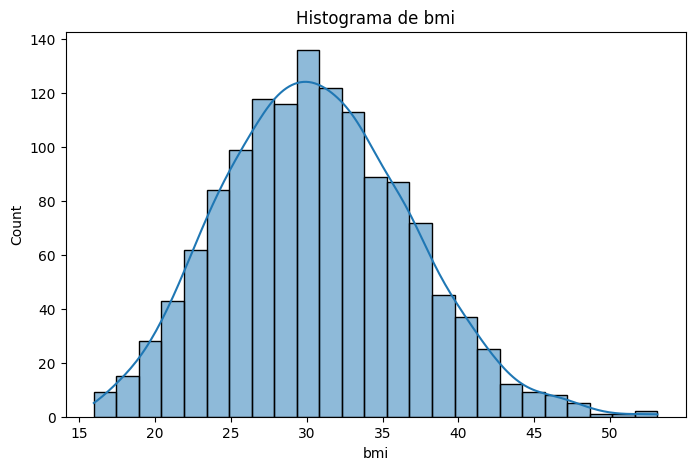

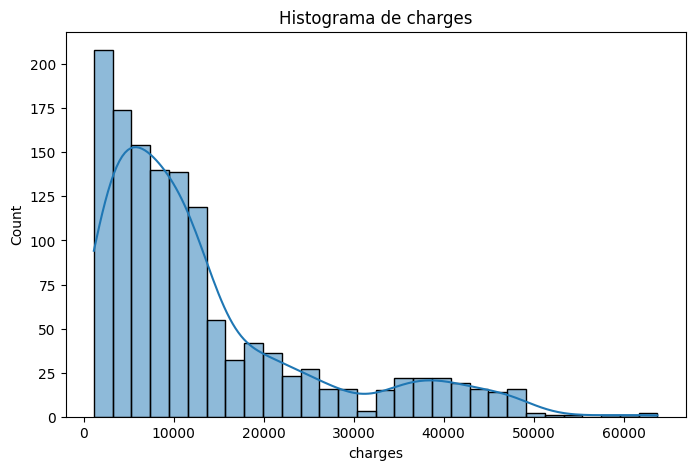

In [ ]:
# Histograms for numerical variables
variables_numericas = ['age', 'bmi', 'charges']

for col in variables_numericas:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Histograma de {col}')
    plt.xlabel(col)
    plt.show()


La variable age tiene una distribucion multimodal lo cual es normal por las caracteristicas propias de dicha variable al representar diferentes grupos de edad.

La variable BMI tiene una distribucion normal con la frencuencia mas elevada en el punto 30.

La variable charges tiene una distribucion sesgada a la derecha, con la mayor parte de los valores en los costos de cobertura menores a 14,000


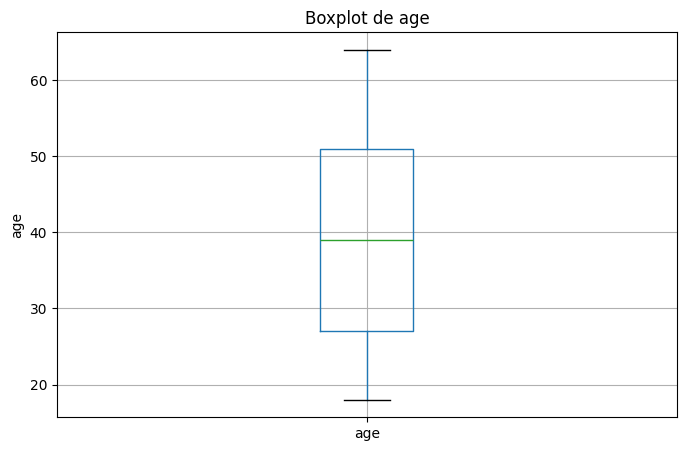

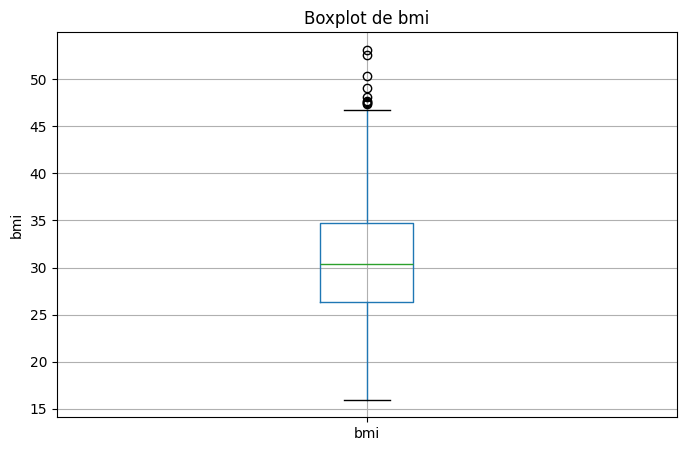

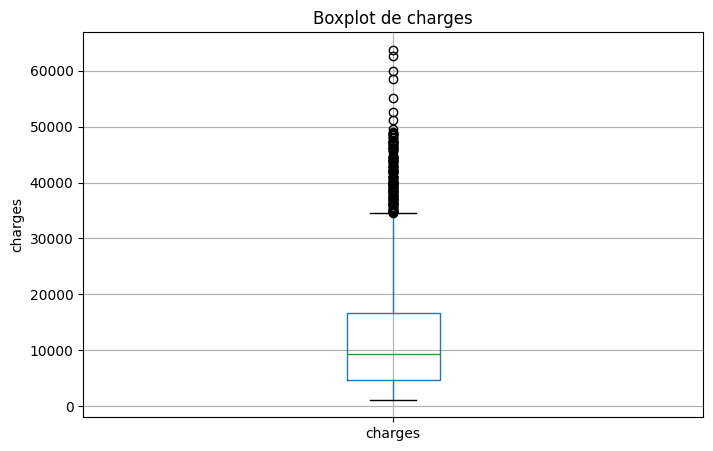

In [ ]:
# Boxplots for numerical variables
for col in variables_numericas:
    plt.figure(figsize=(8, 5))
    df.boxplot(column=col)
    plt.title(f'Boxplot de {col}')
    plt.ylabel(col)
    plt.show()



AL momento de realizar el boxplot para identificar valores outliers en las variables numericas se observaron los siguientes puntos:

La variable age tiene un rango de 27 a 51 sin outliers aparentemente en la grafica pero al momento de revistar los datos de estadistica descriptiva observamos que el valor minimo es 15 y el maximo 53, en tanto que la mediana y la moda de la variable se ubican en el punto 30.

La variable BMI presenta varios datos atipicos, los cuales se estaran revisando a detalle.

La variable charges tambien presenta varios datos atipicos.

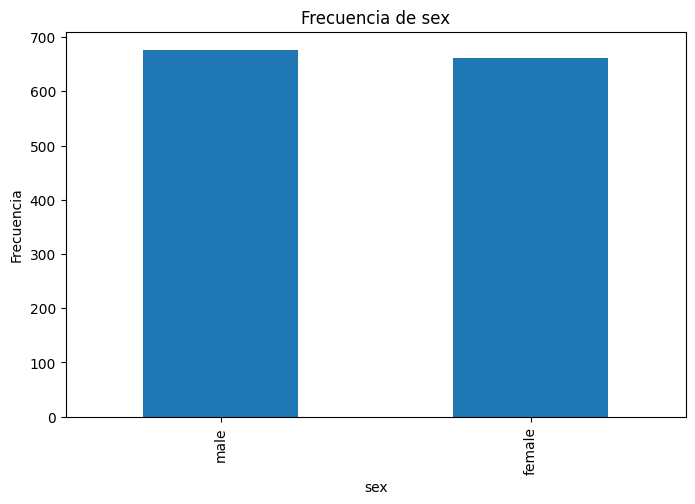

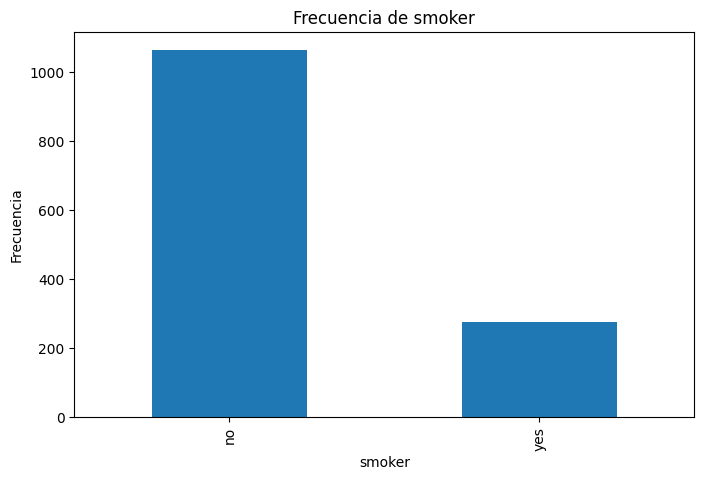

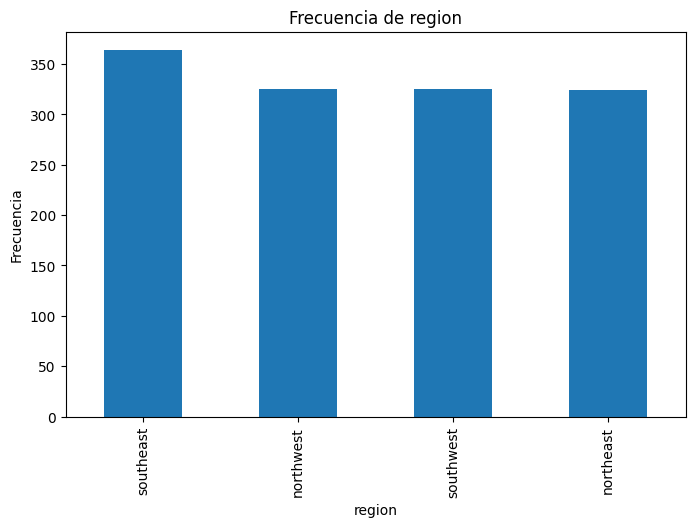

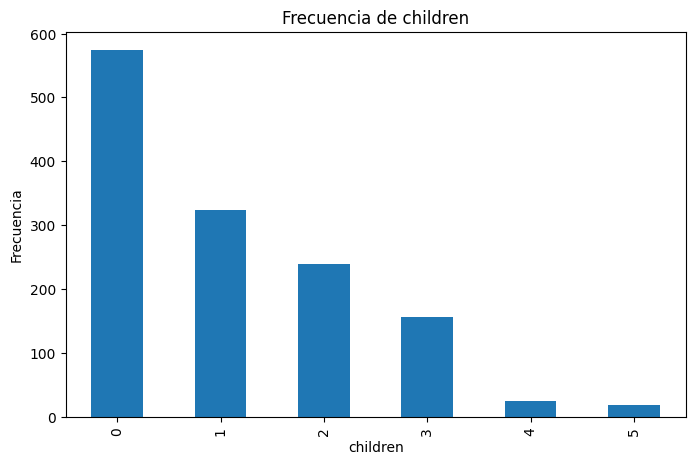

In [ ]:
# Bar plots for categorical variables
categorical_cols = ['sex', 'smoker', 'region', 'children']

for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Frecuencia de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()

La variable region se observa balanceada al todas mostrar frecuencias muy similares.

La variable children muestra desbalanceo en el frecuencia de las clases, lo cual se puede considerar normal por la naturaleza de la variable al observarse que la mayoria de los casos analizados corresponde a familias con 0 a 3 ninos principalmente en tanto que las familias que contratan seguros y tienen de 4 a 5 ninos tienen una frecuencia muy baja

#### **🔹 Paso 3: Matriz de Correlación**  
✅ Calcular la matriz de correlación **solo para variables numéricas**.  
✅ Generar un **mapa de calor** para visualizar relaciones.  
📌 **Pregunta:** ¿Qué variables están más correlacionadas con el target (`charges`)? (salida del dataset)  


La matriz de correlación cuantifica la relación lineal que observamos en los gráficos. Un mapa de calor facilita la visualización de estas relaciones, especialmente para identificar correlaciones altas entre predictores (multicolinealidad).
Fórmula (Coeficiente de Correlación de Pearson):

$$r = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^n (x_i - \bar{x})^2 \sum_{i=1}^n (y_i - \bar{y})^2}}$$


Este valor va de -1 (correlación negativa perfecta) a +1 (correlación positiva perfecta). Un valor cercano a 0 indica ausencia de correlación lineal.


### Matriz de Correlación ###
              age       bmi   charges
age      1.000000  0.109272  0.299008
bmi      0.109272  1.000000  0.198341
charges  0.299008  0.198341  1.000000


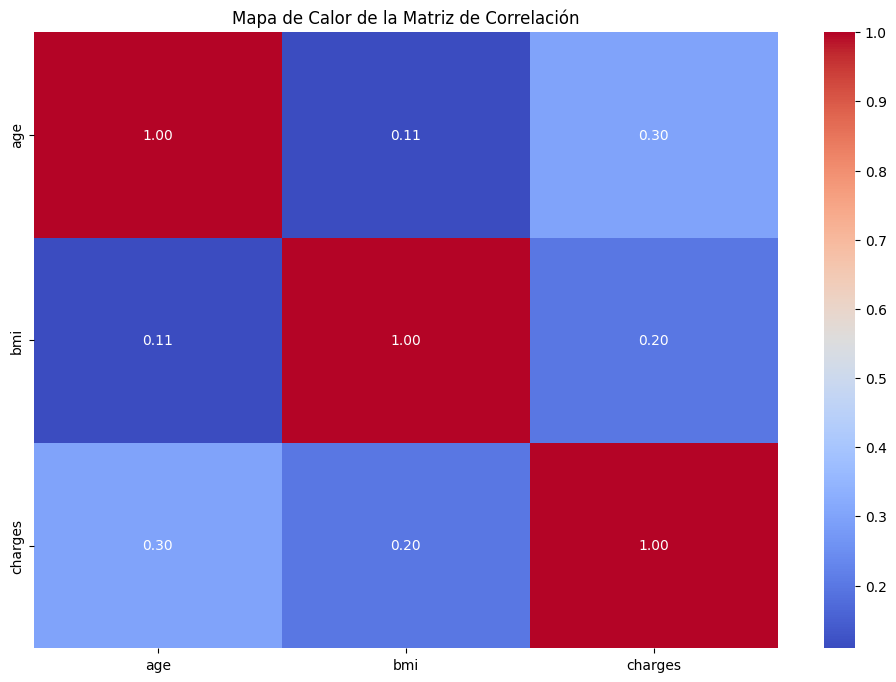

In [ ]:
# Correlación y heatmap

print("\n### Matriz de Correlación ###")
# Select only numerical columns for correlation calculation
numerical_df = df.select_dtypes(include=np.number)
correlation_matrix = numerical_df.corr()
print(correlation_matrix)

# Generate a heatmap for the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor de la Matriz de Correlación')
plt.show()

Conclusiones:

Charges vs age: Se observa una relación positiva (aproximadamente 0.30). A medida que aumenta la edad aumentan las cuotas de cobertura de seguro. La variable Age es la que tiene mayor correlacion con Charges.

Charges vs BMI: También se aprecia una relación positiva aunque no tan fuerte como el punto previo (aproximadamente 0.20). De manera simple no es posible observar una relacion lineal clara ya que los puntos se encuentran muy dispersos, pero es posible observar algunas tendencias.

Charges vs Children: También se aprecia una relación positiva aunque muy debil (aproximadamente 0.07) lo cual confirma una ausencia de correlacion lineal. Es la variable numerica con menor impacto en el costo de cobertura de insurance.


#### **🔹 Paso 4: Preprocesamiento**  
🔧 **Tareas:**  
1. Manejar valores faltantes con `SimpleImputer`.  
2. Codificar variables categóricas con `OneHotEncoder`.  
3. Estandarizar variables numéricas con `StandardScaler`.  
✅ Verificar que el dataset transformado no tenga valores nulos.  



In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Separar las columnas por el tipo de transformación que necesitan.
numeric_features = ['age', 'bmi', 'charges']
categorical_features = ['sex', 'smoker', 'region', 'children']

# Crear los "Pipelines" (Recetas) ---
# Crear el pipeline para las variables numéricas
numeric_transformer = Pipeline(steps=[
    # Paso 1: Manejar valores faltantes rellenando con la mediana
    ('imputer', SimpleImputer(strategy='median')),

    # Paso 2: Estandarizar las variables (media 0, desviación 1)
    ('scaler', StandardScaler())
])

# Crear el pipeline para las variables categóricas
categorical_transformer = Pipeline(steps=[
    # Paso 1: Manejar valores faltantes rellenando con el valor más frecuente
    ('imputer', SimpleImputer(strategy='most_frequent')),

    # Paso 2: Codificar las variables (convertir texto a números binarios)
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


In [ ]:
# --- 4. Combinar los pipelines con ColumnTransformer ---
# Este es el "procesador" principal.
# Le dice a scikit-learn: "Aplica el pipeline numérica a las columnas numéricas
# y el pipeline categórica a las columnas categóricas".
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])



In [ ]:
# --- 5. Aplicar el preprocesador ---
# .fit_transform() "aprende" las medianas, modas, etc., y luego transforma los datos.
# El resultado es un array de NumPy, no un DataFrame de pandas.
data_processed = preprocessor.fit_transform(df)

print(f"\nDatos transformados. Nueva forma: {data_processed.shape}")
print("Nota: La forma cambia por el OneHotEncoder (ej. 'region' se vuelve 4 columnas).")



Datos transformados. Nueva forma: (1338, 17)
Nota: La forma cambia por el OneHotEncoder (ej. 'region' se vuelve 4 columnas).


In [ ]:
# --- 5. Aplicar el preprocesador ---
# .fit_transform() "aprende" las medianas, modas, etc., y luego transforma los datos.
# El resultado es un array de NumPy.
data_processed = preprocessor.fit_transform(df)

# Convert the NumPy array back to a pandas DataFrame to use .info()
data_processed_df = pd.DataFrame(data_processed)

print(f"\nDatos transformados. Nueva forma: {data_processed.shape}")
print("Nota: La forma cambia por el OneHotEncoder (ej. 'region' se vuelve 4 columnas).")

print(data_processed_df.info())


Datos transformados. Nueva forma: (1338, 17)
Nota: La forma cambia por el OneHotEncoder (ej. 'region' se vuelve 4 columnas).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1338 non-null   float64
 1   1       1338 non-null   float64
 2   2       1338 non-null   float64
 3   3       1338 non-null   float64
 4   4       1338 non-null   float64
 5   5       1338 non-null   float64
 6   6       1338 non-null   float64
 7   7       1338 non-null   float64
 8   8       1338 non-null   float64
 9   9       1338 non-null   float64
 10  10      1338 non-null   float64
 11  11      1338 non-null   float64
 12  12      1338 non-null   float64
 13  13      1338 non-null   float64
 14  14      1338 non-null   float64
 15  15      1338 non-null   float64
 16  16      1338 non-null   float64
dtypes: float64(17)
memory usage: 177.8 KB
None


In [ ]:

# --- 6. ✅ Verificar Nulos ---
# Usamos NumPy para verificar si hay valores "NaN" (Not a Number)
# en el array resultante.
total_nulls = np.isnan(data_processed).sum()

print("="*50)
print(f"Total de valores nulos después del preprocesamiento: {total_nulls}")

if total_nulls == 0:
    print("✅ Verificación exitosa: No hay valores nulos.")
else:
    print("❌ Error: Aún quedan valores nulos en el resultado.")
print("="*50)




Total de valores nulos después del preprocesamiento: 0
✅ Verificación exitosa: No hay valores nulos.


In [ ]:
# --- Listado de nuevas columnas generadas para el preprocesamiento ---

# Primero, obtenemos los nombres de las nuevas columnas del OneHotEncoder
cat_feature_names = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features)

# Combinamos los nombres de las columnas numéricas originales + las nuevas categóricas
all_feature_names = numeric_features + list(cat_feature_names)

# Convertimos el array de NumPy de nuevo a un DataFrame de pandas
df_processed_final = pd.DataFrame(data_processed, columns=all_feature_names)

print("\n--- Vista previa del DataFrame final preprocesado ---")
print(df_processed_final.head().to_markdown(floatfmt=".4f"))


--- Vista previa del DataFrame final preprocesado ---
|    |     age |     bmi |   charges |   sex_female |   sex_male |   smoker_no |   smoker_yes |   region_northeast |   region_northwest |   region_southeast |   region_southwest |   children_0 |   children_1 |   children_2 |   children_3 |   children_4 |   children_5 |
|---:|--------:|--------:|----------:|-------------:|-----------:|------------:|-------------:|-------------------:|-------------------:|-------------------:|-------------------:|-------------:|-------------:|-------------:|-------------:|-------------:|-------------:|
|  0 | -1.4388 | -0.4533 |    0.2986 |       1.0000 |     0.0000 |      0.0000 |       1.0000 |             0.0000 |             0.0000 |             0.0000 |             1.0000 |       1.0000 |       0.0000 |       0.0000 |       0.0000 |       0.0000 |       0.0000 |
|  1 | -1.5100 |  0.5096 |   -0.9537 |       0.0000 |     1.0000 |      1.0000 |       0.0000 |             0.0000 |             0.0000

#### **🔹 Paso 5: Modelado (Lasso y Ridge)**  
🎯 **Para cada modelo:**  
1. Ajustar el modelo con los hiperparámetros dados (`alpha=0.1` para Lasso, `alpha=1.0` para Ridge).  
2. Calcular **MSE** y **R²** para evaluar rendimiento.  
3. Analizar los coeficientes para identificar variables importantes.  

📌 **Pregunta:**  
- ¿Qué modelo tiene un mejor R²? ¿Por qué crees que ocurre esto?  
- ¿Qué variables tienen coeficientes cercanos a cero en Lasso? ¿Por qué?  


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# --- Importación de Modelos ---
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score

# --- 2. Definir Columnas y Target ---
# 'y' es nuestro objetivo (lo que queremos predecir)
y = df['charges']
# 'X' son todas las columnas MENOS nuestro objetivo
X = df.drop('charges', axis=1)

# Definimos qué columnas son numéricas y cuáles categóricas
numeric_features = ['age', 'bmi'] # 'charges' ya no está en X
categorical_features = ['sex', 'smoker', 'region', 'children']

# --- 3. Definir el Pipeline de Preprocesamiento (Como antes) ---

# "Receta" para columnas numéricas
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# "Receta" para columnas categóricas
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Combinamos las recetas en el preprocesador
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough' # Mantiene columnas no especificadas (si las hubiera)
)

# --- 4. Dividir los Datos en Entrenamiento y Prueba ---
# Usamos 80% para entrenar y 20% para probar
# random_state=42 asegura que siempre obtengamos la misma división (reproducibilidad)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Datos de entrenamiento: {X_train.shape[0]} muestras")
print(f"Datos de prueba: {X_test.shape[0]} muestras")


# --- 5. Crear los Pipelines Completos (Preprocesador + Modelo) ---

# Modelo 1: Regresión Lineal Simple
pipe_lr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Modelo 2: Regresión Lasso (con alpha=0.1)
pipe_lasso = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', Lasso(alpha=0.1))
])

# Modelo 3: Regresión Ridge (con alpha=1.0)
pipe_ridge = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', Ridge(alpha=1.0))
])

# Lista de modelos para iterar
models = {
    "Linear Regression": pipe_lr,
    "Lasso (alpha=0.1)": pipe_lasso,
    "Ridge (alpha=1.0)": pipe_ridge
}

# --- 6. Entrenar y Evaluar los Modelos ---

print("\n" + "="*50)
print("INICIANDO ENTRENAMIENTO Y EVALUACIÓN")
print("="*50)

results = {}

for name, pipe in models.items():
    # 6.1. Ajustar (Entrenar) el modelo
    print(f"Entrenando {name}...")
    pipe.fit(X_train, y_train)

    # 6.2. Predecir con los datos de prueba
    y_pred = pipe.predict(X_test)

    # 6.3. Calcular Métricas
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Guardar resultados
    results[name] = {"MSE": mse, "R²": r2}

    print(f"--- Resultados para {name} ---")
    print(f"  Mean Squared Error (MSE): {mse:.2f}")
    print(f"  R-squared (R²):           {r2:.4f}")
    print("-"*40)


# --- 7. Analizar los Coeficientes ---

print("\n" + "="*50)
print("ANÁLISIS DE COEFICIENTES")
print("="*50)

# Obtener los nombres de las características después del preprocesamiento
# 1. Nombres numéricos (fácil)
num_names = numeric_features

# 2. Nombres categóricos (vienen del OneHotEncoder)
cat_names = pipe_lr.named_steps['preprocessor'].named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features)

# 3. Lista completa de nombres
all_feature_names = list(num_names) + list(cat_names)

# Crear un DataFrame para comparar los coeficientes
coefs_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Coef_Linear': pipe_lr.named_steps['model'].coef_,
    'Coef_Lasso': pipe_lasso.named_steps['model'].coef_,
    'Coef_Ridge': pipe_ridge.named_steps['model'].coef_
})

# Imprimir el DataFrame de coeficientes
# Usamos .style.format() para redondear los números y facilitar la lectura
print(coefs_df.to_markdown(index=False, floatfmt=".2f"))

Datos de entrenamiento: 1070 muestras
Datos de prueba: 268 muestras

INICIANDO ENTRENAMIENTO Y EVALUACIÓN
Entrenando Linear Regression...
--- Resultados para Linear Regression ---
  Mean Squared Error (MSE): 33756429.70
  R-squared (R²):           0.7826
----------------------------------------
Entrenando Lasso (alpha=0.1)...
--- Resultados para Lasso (alpha=0.1) ---
  Mean Squared Error (MSE): 33756694.53
  R-squared (R²):           0.7826
----------------------------------------
Entrenando Ridge (alpha=1.0)...
--- Resultados para Ridge (alpha=1.0) ---
  Mean Squared Error (MSE): 33768785.90
  R-squared (R²):           0.7825
----------------------------------------

ANÁLISIS DE COEFICIENTES
| Feature          |   Coef_Linear |   Coef_Lasso |   Coef_Ridge |
|:-----------------|--------------:|-------------:|-------------:|
| age              |       3629.26 |      3629.13 |      3624.46 |
| bmi              |       2023.63 |      2023.43 |      2021.88 |
| sex_female       |         1

In [ ]:
# --- 3. Dividir Datos ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- 4. Definir y Entrenar Modelos ---
models = {
    "Linear Regression": LinearRegression(), # Lo incluimos como base
    "Lasso (alpha=0.1)": Lasso(alpha=0.1),
    "Ridge (alpha=1.0)": Ridge(alpha=1.0)
}

# DataFrames para guardar resultados
results = []
all_coefs = {}

# Nombres de las características
# (ajustamos el preprocesador solo en X_train para obtener los nombres)
preprocessor.fit(X_train)
cat_names = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features)
all_feature_names = numeric_features + list(cat_names)

print("Entrenando modelos...")
for name, model in models.items():

    # Crear el pipeline completo
    pipe = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    # Entrenar
    pipe.fit(X_train, y_train)

    # --- MEDICIÓN DE SOBREAJUSTE ---
    # Predecir en datos de ENTRENAMIENTO (Train)
    y_pred_train = pipe.predict(X_train)
    r2_train = r2_score(y_train, y_pred_train)

    # Predecir en datos de PRUEBA (Test)
    y_pred_test = pipe.predict(X_test)
    r2_test = r2_score(y_test, y_pred_test)

    results.append({
        "Modelo": name,
        "R² (Train)": r2_train,
        "R² (Test)": r2_test,
        "Gap (Sobreaajuste)": r2_train - r2_test
    })

    # Guardar coeficientes
    all_coefs[name] = pipe.named_steps['model'].coef_

print("¡Modelos entrenados!")

# --- 5. Análisis de Resultados ---

# --- Punto 1 y 3: Interpretación y Variables Importantes ---
print("\n" + "="*50)
print("ANÁLISIS DE INTERPRETABILIDAD Y COEFICIENTES")
print("="*50)
coefs_df = pd.DataFrame(all_coefs, index=all_feature_names)
coefs_df.index.name = "Variable"

# Redondeamos para legibilidad
print(coefs_df.to_markdown(floatfmt=".2f"))

print("\n--- Variables más importantes (por magnitud en Lasso) ---")
print(coefs_df[['Lasso (alpha=0.1)']].abs().sort_values(by='Lasso (alpha=0.1)', ascending=False).to_markdown(floatfmt=".2f"))


# --- Punto 2: Reducción de Sobreajuste ---
print("\n" + "="*50)
print("ANÁLISIS DE SOBREAJUSTE (OVERFITTING)")
print("="*50)
results_df = pd.DataFrame(results)
print(results_df.to_markdown(index=False, floatfmt=".4f"))

Entrenando modelos...
¡Modelos entrenados!

ANÁLISIS DE INTERPRETABILIDAD Y COEFICIENTES
| Variable         |   Linear Regression |   Lasso (alpha=0.1) |   Ridge (alpha=1.0) |
|:-----------------|--------------------:|--------------------:|--------------------:|
| age              |             3629.26 |             3629.13 |             3624.46 |
| bmi              |             2023.63 |             2023.43 |             2021.88 |
| sex_female       |               15.68 |               30.81 |               13.22 |
| sex_male         |              -15.68 |               -0.00 |              -13.22 |
| smoker_no        |           -11828.13 |           -23655.43 |           -11792.85 |
| smoker_yes       |            11828.13 |                0.00 |            11792.85 |
| region_northeast |              478.48 |              668.49 |              477.09 |
| region_northwest |               58.05 |              248.02 |               56.22 |
| region_southeast |             -190.98 

1. 1. El Modelo Lasso (Regularización L1)

Objetivo Principal: Lasso es un "Selector de Características". Su misión es encontrar las variables más importantes y eliminar las inútiles (o redundantes) poniendo su coeficiente exactamente en cero.

Coeficientes grandes (Lejos de cero):
smoker_no: Tiene un coeficiente negativo grande, lo cual indica que si la persona no fuma el costo del seguro baja mucho respecto a si la persona fuma.

age: Tiene un coeficiente positivo grande, lo cual indica que a mayor edad mayor es el costo del seguro.

bmi: Tiene un coeficiente positivo grande, lo cual indica que a mayor indice de masa corporal tambien sera mayor el costo del seguro, lo cual es comprensible por las enferemedades que puede generar un alto indice de masa corporal.

children_4: Si la familia tiene cuatro ninos el costo del seguro sube en un porcentaje importante en tanto que si la familia tiene menos ninos se muestra un coeficiente negativo pequeno

Coeficientes CERO (o muy cercanos a cero):

sex_male / sex_female: Tiene un coeficiente muy bajo en ambos casos lo cual indica que el sexo no es predictor importante.

Algunas regiones: Lasso asigno un coeficiente cero para varias regiones con lo cual confirma que estas regiones no tienen un impacto en el costo del seguro.

Métricas (R²):
El R² es alto, 78.26%. Esto significa que el modelo considerando solo las variables seleccionadas con coeficientes grandes logra explicar cerca del 78% de la variabilidad en los costos del seguro.

2. El Modelo Ridge (Regularización L2)

Objetivo Principal: Ridge es un "Estabilizador" cuya mision es reducir el impacto de todas las variables, especialmente de las que están correlacionadas (como las columnas creadas por el OneHotEncoder).

Coeficientes grandes
smoker_yes, age, bmi, children_4. Estas son las mismas variables identificadas como altos coeficientes en Lasso pero cuya magnitud es menor para Ridge.

Qué deberías estar viendo en tus resultados de Ridge:
Coeficientes Grandes (Pero más pequeños que en Regresión Lineal):
smoker_yes, age, bmi: Seguirán siendo los coeficientes más grandes, pero si los comparas con los del modelo de Regresión Lineal simple, verás que Ridge los ha "encogido" o "penalizado" un poco para evitar el sobreajuste.

Coeficientes cercanos a cero
sex_male / sex_female, regions muestran un coeficiente bajo sin llegar a codificarlas como cero. Esto es especialmente útil para manejar la multicolinealidad (que el OneHotEncoder introduce automáticamente).

Métricas (R² y MSE):
El R² obtenido para Ridge es identico al obtenido usando Lasso.

Comparación Lasso vs Ridge

| Característica Modelo Lasso (L1) | Modelo Ridge (L2) |
|---------|---------|
| Objetivo Selección de Características Estabilización | Manejo de Colinealidad |
| Coeficientes Produce "ceros" (sparse) | Produce números pequeños (dense) |
| Resultado Un modelo más simple (con menos variables) | Un modelo más estable (usa todas las variables).|


¿Qué modelo tiene un mejor R²? ¿Por qué crees que ocurre esto? Ambos modelos tienen un R² identico por lo tanto es dificil tomar esta metrica como punto de comparacion dada la feature "smoker_yes" que tiene un impacto muy grande en la variable objetivo sin importar el modelo.
Si adicional a la metrica de R² se busca simplicidad, considero que el mejor modelo es Lasso ya que trabaja solo con las variables mas importantes en tant oque si el objetivo es estabilidad, el mejor modelo es Ridge ya que incluye todas las variables  aun las que tienen bajo impacto.

¿Qué variables tienen coeficientes cercanos a cero en Lasso? ¿Por qué?

sex_male / sex_female: Tiene un coeficiente muy bajo en ambos casos lo cual indica que el sexo no es predictor importante.

Algunas regiones: Lasso asigno un coeficiente cero para varias regiones con lo cual confirma que estas regiones no tienen un impacto en el costo del seguro.


La multicolinealidad ocurre cuando las variables independientes están correlacionadas entre sí. Esto puede hacer que los coeficientes del modelo sean inestables y difíciles de interpretar. El Factor de Inflación de la Varianza (VIF) mide cuánto se infla la varianza de un coeficiente debido a la multicolinealidad.

$$VIF_i = \frac{1}{1 - R_i^2}$$

Donde R_i^2 es el R-cuadrado de un modelo que predice la variable X_i a partir de las otras variables independientes.

Regla general:

VIF = 1: No hay multicolinealidad.

1 < VIF < 5: Multicolinealidad moderada (generalmente aceptable).

VIF > 5 o 10: Multicolinealidad alta (problemática).


#### **🔹 Paso 6: Verificación de Supuestos**  
📉 **Para cada modelo, verificar:**  
1. **Linealidad** (gráfico de residuos vs predicciones).  
2. **Normalidad de residuos** (QQ-Plot y test de Shapiro-Wilk).  
3. **Homocedasticidad**
4. **Multicolinealidad** (VIF > 10 indica problema).  

📌 **Pregunta:**  
- ¿Se cumplen los supuestos en ambos modelos?  
- Si hay heterocedasticidad, ¿cómo podría solucionarse?  



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Lasso, Ridge

y = df['charges']
X = df.drop('charges', axis=1)

numeric_features = ['age', 'bmi']
categorical_features = ['sex', 'smoker', 'region', 'children']

# --- 2. Definir Preprocesador (CON drop='first' para VIF) ---
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first', sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'
)



In [ ]:
# --- 3. Dividir y Entrenar Modelos ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo Lasso
pipe_lasso = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', Lasso(alpha=0.1))
])

# Modelo Ridge
pipe_ridge = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', Ridge(alpha=1.0))
])

print("Entrenando modelos...")
pipe_lasso.fit(X_train, y_train)
pipe_ridge.fit(X_train, y_train)
print("Modelos entrenados.")



Entrenando modelos...
Modelos entrenados.



VERIFICANDO SUPUESTOS PARA: Lasso (alpha=0.1)
Generando Gráfico de Residuos (Lasso (alpha=0.1))...


<>:20: SyntaxWarning: invalid escape sequence '\h'
<>:21: SyntaxWarning: invalid escape sequence '\h'
<>:20: SyntaxWarning: invalid escape sequence '\h'
<>:21: SyntaxWarning: invalid escape sequence '\h'
/tmp/ipython-input-146852.py:20: SyntaxWarning: invalid escape sequence '\h'
  plt.xlabel('Valores Predichos ($\hat{y}$)')
/tmp/ipython-input-146852.py:21: SyntaxWarning: invalid escape sequence '\h'
  plt.ylabel('Residuos ($y - \hat{y}$)')


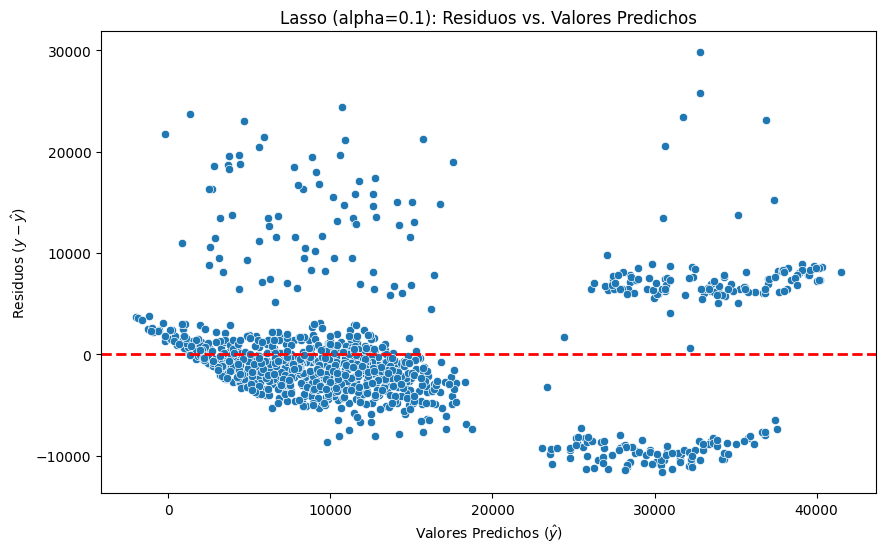


Generando QQ-Plot de Residuos (Lasso (alpha=0.1))...


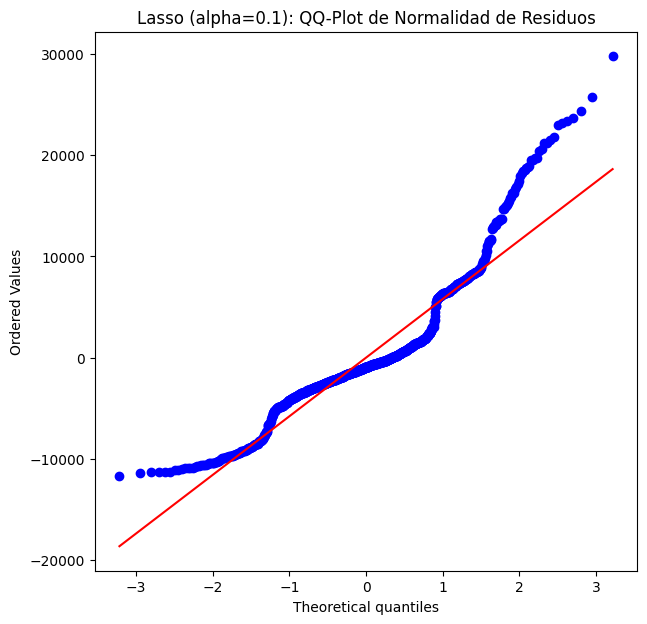

Calculando Test de Shapiro-Wilk (Lasso (alpha=0.1))...
  Estadístico de Shapiro: 0.9003
  P-value de Shapiro: 8.500000922577994e-26
  Conclusión: Los residuos NO están normalmente distribuidos (p < 0.05).

VERIFICANDO SUPUESTOS PARA: Ridge (alpha=1.0)
Generando Gráfico de Residuos (Ridge (alpha=1.0))...


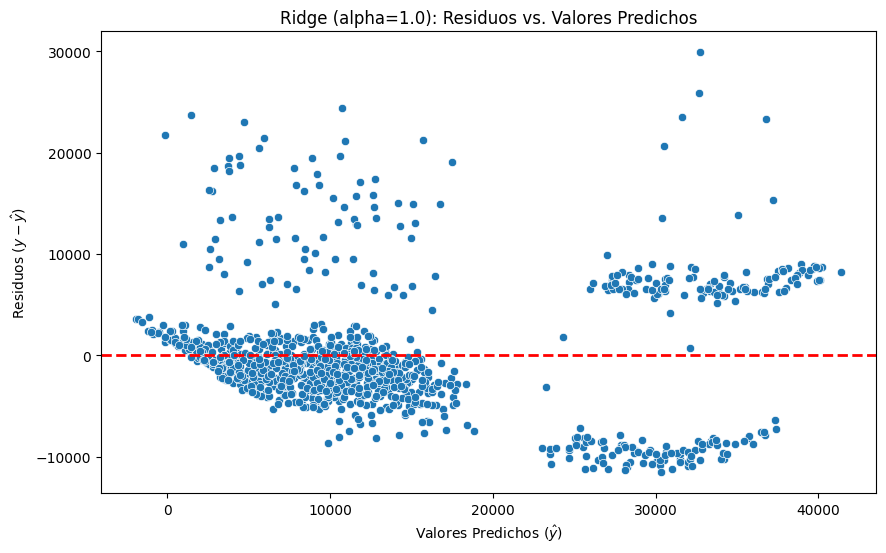


Generando QQ-Plot de Residuos (Ridge (alpha=1.0))...


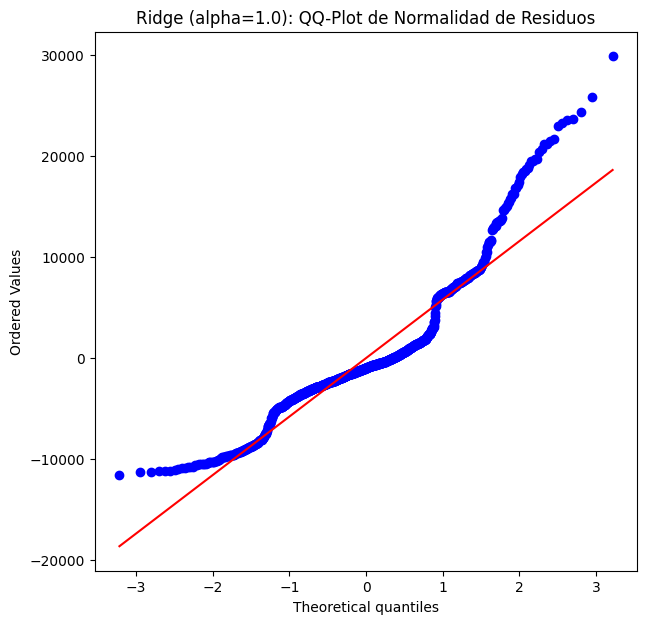

Calculando Test de Shapiro-Wilk (Ridge (alpha=1.0))...
  Estadístico de Shapiro: 0.8989
  P-value de Shapiro: 5.858332125655782e-26
  Conclusión: Los residuos NO están normalmente distribuidos (p < 0.05).

VERIFICANDO MULTICOLINEALIDAD (VIF)


In [ ]:
# --- 4. Función para Verificar Supuestos (Linealidad, Normalidad) ---
def verificar_supuestos_residuos(model_name, model_pipeline, X_train_data, y_train_data):
    """
    Genera gráficos de residuos y test de normalidad para un modelo.
    """
    print("\n" + "="*50)
    print(f"VERIFICANDO SUPUESTOS PARA: {model_name}")
    print("="*50)

    # Calcular residuos usando datos de ENTRENAMIENTO
    y_train_pred = model_pipeline.predict(X_train_data)
    residuals = y_train_data - y_train_pred

    # --- 4.1. Linealidad y Homocedasticidad (Gráfico de Residuos) ---
    print(f"Generando Gráfico de Residuos ({model_name})...")
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_train_pred, y=residuals)
    plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
    plt.title(f'{model_name}: Residuos vs. Valores Predichos')
    plt.xlabel('Valores Predichos ($\hat{y}$)')
    plt.ylabel('Residuos ($y - \hat{y}$)')
    plt.show()

    # --- 4.2. Normalidad de Residuos (QQ-Plot y Shapiro-Wilk) ---
    print(f"\nGenerando QQ-Plot de Residuos ({model_name})...")
    plt.figure(figsize=(7, 7))
    stats.probplot(residuals, dist="norm", plot=plt)
    plt.title(f'{model_name}: QQ-Plot de Normalidad de Residuos')
    plt.show()

    print(f"Calculando Test de Shapiro-Wilk ({model_name})...")
    shapiro_stat, shapiro_p = stats.shapiro(residuals)
    print(f"  Estadístico de Shapiro: {shapiro_stat:.4f}")
    print(f"  P-value de Shapiro: {shapiro_p}")

    if shapiro_p > 0.05:
        print("  Conclusión: Los residuos PARECEN normalmente distribuidos (p > 0.05).")
    else:
        print("  Conclusión: Los residuos NO están normalmente distribuidos (p < 0.05).")

# --- 5. Ejecutar Verificación para cada modelo ---
verificar_supuestos_residuos("Lasso (alpha=0.1)", pipe_lasso, X_train, y_train)
verificar_supuestos_residuos("Ridge (alpha=1.0)", pipe_ridge, X_train, y_train)


# --- 6. Verificación de Multicolinealidad (VIF) ---
# Esto se hace sobre los predictores (X), por lo que es IDÉNTICO para ambos modelos.
print("\n" + "="*50)
print("VERIFICANDO MULTICOLINEALIDAD (VIF)")
print("="*50)



In [ ]:
# 1. Obtener los datos X_train preprocesados
X_train_processed = preprocessor.transform(X_train)

# 2. Obtener los nombres de las columnas
cat_names = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features)
all_feature_names = numeric_features + list(cat_names)

# 3. Crear un DataFrame con los datos procesados
X_train_processed_df = pd.DataFrame(X_train_processed, columns=all_feature_names)

# 4. Calcular VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X_train_processed_df.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_processed_df.values, i)
                   for i in range(X_train_processed_df.shape[1])]

print(vif_data.to_markdown(index=False, floatfmt=".2f"))

if vif_data['VIF'].max() > 10:
    print("\nConclusión: ¡Problema de multicolinealidad detectado! (VIF > 10)")
elif vif_data['VIF'].max() > 5:
    print("\nConclusión: Cierta multicolinealidad presente (VIF > 5).")
else:
    print("\nConclusión: No se detecta multicolinealidad significativa (VIF < 5).")

| feature          |   VIF |
|:-----------------|------:|
| age              |  1.03 |
| bmi              |  1.08 |
| sex_male         |  1.76 |
| smoker_yes       |  1.25 |
| region_northwest |  1.41 |
| region_southeast |  1.50 |
| region_southwest |  1.37 |
| children_1       |  1.39 |
| children_2       |  1.31 |
| children_3       |  1.19 |
| children_4       |  1.03 |
| children_5       |  1.03 |

Conclusión: No se detecta multicolinealidad significativa (VIF < 5).


¿Se cumplen los supuestos en ambos modelos?

Linealidad: Aun cuando no se observa un patron claro en la distribucion de los residuos  (la diferencia entre el valor real y el valor predicho) tampoco se observa una distribucion aleatoria alrededor de cero. Mas bien se observa clusters de puntos lo cuales pueden agrupar fumadores o no fumadores, con alto BMI o bajo BMI, con edad avanzada o edad temprana, los cuales son las variables con altos coeficientes.

Ademas el grafico de residuos muestra algunas tendencias en numeros grandes lo cual conlleva a pensar que entre mayor son los valores predichos tambien mayor sera la dispersion y el margen de error. La heteroescedasticidad significa que el modelo genera un error mayor a medida que el costo predicho (charges) aumenta, es decir es mucho menos confiable al predecir costos de seguros altos que costos de seguros bajos. Tal vez esto se podria relacionar con la distribucion sesgada a la derecha que muestra la variable objetivo.

QQ-Plot muestra que los puntos se desvian en los extremos es decir tienen colas pesadas.

Test de SHapiro-Wilk muestra un p-value muy bajo 5.858332125655782e-26 lo que rechaza la hipotesis que los residuos son normales.

Multiconlinealidad - Los dos modelos muestran valores muy bajos, menores a dos, por lo tanto se concluye que no se detecta multiconlinealidad significativa.

Si hay heterocedasticidad, ¿cómo podría solucionarse?

Se observaron clusters de puntos muy marcados con mayor dispersion en los valores positivos por ejemplo cuando los residuos estan entre 10,000 y 20,00 que cuando los valores son negativos y estan entre 0 y -10,000 en cuyo caso se observa un mayor volumen de puntos juntos lo cual indica que cuando se tiene un residuo alrededor de +10,000 el valor real fue 10,000 mayor que lo predicho y cuando el residuo es -1,000 se tiene un valor real menor por 1,000 a lo predicho, en la grafica se observa muchos puntos como este, es decir el modelo tuvo muchas diferencias entre los valores predichos y los valores reales, es decir lo ideal es que los puntos estan alreadedor de la linea horizontal en 0.

La heterocedasticiad se reconoce por el efecto de patron de cono que es cuando a la izquierda (Valores Bajos): Los puntos están muy cerca de la línea cero. (Poco error). A la derecha (Valores Altos): Los puntos se dispersan hacia arriba y hacia abajo, cada vez más lejos de la línea cero. (Mucho error). Por lo tanto cuando se presenta este impacto indica que el modelo es muy malo prediciendo costos altos ya que genera errores gigantescos y dispersos por lo cual un modelo heterocedástico no es confiable ya que cambia dependiendo del resultado.

La opcion para solucionar la heterocedasticiad es aplicar transformación logarítmica ya que arregla las escalas de los datos, haciendo que el error vuelva a ser constante en todas partes ya que comprime los números grandes y expande los números pequeños.
Se usa casi siempre para corregir variables que tienen un sesgo positivo (o "cola a la derecha") como en este caso con la variable "charge" que tiene un sesgo a la derecha.


Variable objetivo transformada (y_log). Sesgo original: 1.52, Sesgo nuevo: -0.09

Entrenando modelo sobre y_log...
Modelo entrenado.

--- Métricas del Modelo (en escala Log) ---
R² (log-space): 0.8056

--- Métricas del Modelo (en escala Original - Dólares) ---
R² (original-space): 0.6198
RMSE (original-space): $7682.56

VERIFICANDO SUPUESTOS (Modelo con y_log)
Generando Gráfico de Residuos (Log-Transformed)...


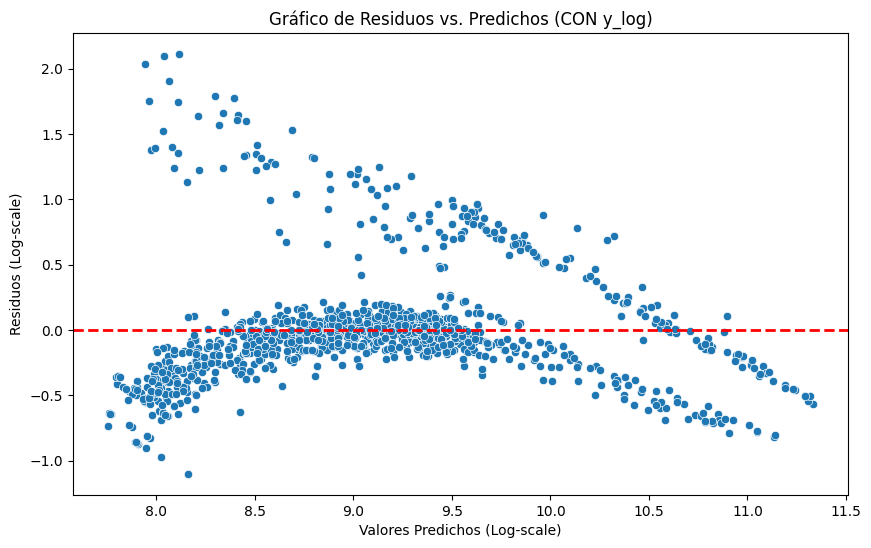


Generando QQ-Plot de Residuos (Log-Transformed)...


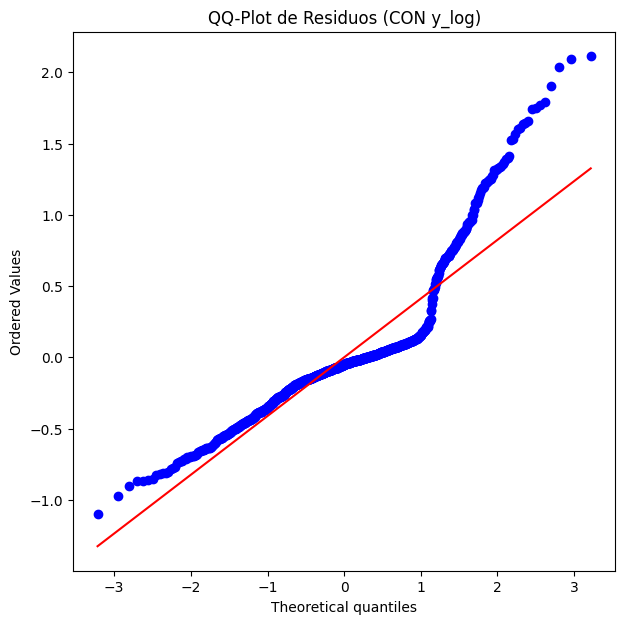

Calculando Test de Shapiro-Wilk (Log-Transformed)...
  Estadístico de Shapiro: 0.8478
  P-value de Shapiro: 7.622212933489979e-31
  ❌ Conclusión: Los residuos NO están normalmente distribuidos (p < 0.05).


In [ ]:
#Codigo para solucionar heterocedaticidad

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Ridge  # Usaremos Ridge como ejemplo
from sklearn.metrics import mean_squared_error, r2_score


# --- 2. Definir X e y (¡CON LA TRANSFORMACIÓN!) ---
X = df.drop('charges', axis=1)

# 🔹 SOLUCIÓN: Aplicamos el logaritmo natural a la variable 'charges'
# Usamos np.log1p(x) que es log(1+x) por si hubiera valores de 0 (aunque en este dataset no hay)
# Pero np.log(df['charges']) también es perfectamente válido aquí.
y_log = np.log(df['charges'])
print(f"Variable objetivo transformada (y_log). Sesgo original: {df['charges'].skew():.2f}, Sesgo nuevo: {y_log.skew():.2f}")


# --- 3. Definir Preprocesador (El mismo de antes) ---
numeric_features = ['age', 'bmi']
categorical_features = ['sex', 'smoker', 'region', 'children']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first', sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'
)

# --- 4. Dividir Datos (Usando y_log) ---
# Nota: Ahora todas nuestras 'y' (y_train_log, y_test_log) estarán en escala logarítmica
X_train, X_test, y_train_log, y_test_log = train_test_split(X, y_log, test_size=0.2, random_state=42)

# --- 5. Entrenar Modelo (Ridge) ---
pipe_ridge_log = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', Ridge(alpha=1.0))
])

print("\nEntrenando modelo sobre y_log...")
pipe_ridge_log.fit(X_train, y_train_log)
print("Modelo entrenado.")

# --- 6. Evaluación (Importante: Doble Evaluación) ---

# 6.1. Predicciones en escala LOGARÍTMICA
y_pred_log = pipe_ridge_log.predict(X_test)

# 6.2. Predicciones en escala ORIGINAL (Dólares)
# Para revertir el log, usamos la exponencial np.exp()
y_test_original = np.exp(y_test_log)
y_pred_original = np.exp(y_pred_log)

# Métricas del modelo en el espacio logarítmico (así es como el modelo se optimizó)
r2_log = r2_score(y_test_log, y_pred_log)
print(f"\n--- Métricas del Modelo (en escala Log) ---")
print(f"R² (log-space): {r2_log:.4f}")

# Métricas del modelo en el espacio original (dólares)
r2_orig = r2_score(y_test_original, y_pred_original)
rmse_orig = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
print(f"\n--- Métricas del Modelo (en escala Original - Dólares) ---")
print(f"R² (original-space): {r2_orig:.4f}")
print(f"RMSE (original-space): ${rmse_orig:.2f}") # Error promedio en dólares


# --- 7. RE-VERIFICACIÓN de Supuestos (La Prueba) ---

print("\n" + "="*50)
print(f"VERIFICANDO SUPUESTOS (Modelo con y_log)")
print("="*50)

# Calcular residuos (en escala logarítmica, que es donde el modelo vive)
y_train_pred_log = pipe_ridge_log.predict(X_train)
residuals_log = y_train_log - y_train_pred_log

# 7.1. Linealidad y Homocedasticidad (Gráfico de Residuos)
print("Generando Gráfico de Residuos (Log-Transformed)...")
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_train_pred_log, y=residuals_log)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.title('Gráfico de Residuos vs. Predichos (CON y_log)')
plt.xlabel('Valores Predichos (Log-scale)')
plt.ylabel('Residuos (Log-scale)')
plt.show()

# 7.2. Normalidad de Residuos (QQ-Plot y Shapiro-Wilk)
print("\nGenerando QQ-Plot de Residuos (Log-Transformed)...")
plt.figure(figsize=(7, 7))
stats.probplot(residuals_log, dist="norm", plot=plt)
plt.title('QQ-Plot de Residuos (CON y_log)')
plt.show()

print("Calculando Test de Shapiro-Wilk (Log-Transformed)...")
shapiro_stat, shapiro_p = stats.shapiro(residuals_log)
print(f"  Estadístico de Shapiro: {shapiro_stat:.4f}")
print(f"  P-value de Shapiro: {shapiro_p}")

if shapiro_p > 0.05:
    print("  ✅ Conclusión: Los residuos PARECEN normalmente distribuidos (p > 0.05).")
else:
    print("  ❌ Conclusión: Los residuos NO están normalmente distribuidos (p < 0.05).")

Despues de realizar la transformacion logaritmica se observa que el grafico de residuos vs predichos muestra una distribucion normal aleatoria, los residuos se mantienen cerca de la linea roja ya sea cuando los valores predichos sean bajos o altos.

🔹 Paso 7: Comparación Final
📊 Analizar:

¿Qué modelo es más interpretable?
La "interpretabilidad" en la regresión lineal se refiere a la simplicidad por lo cual el modelo mas interpretable es el de Lasso ya que aplica la seleccion de caracteristicas al mantener solo las variables utiles y las que tinen un coeficiente cero las elimina por lo cual conserva solo las variables vitales para el modelo lo cual le da simplicidad e interpretabilidad.

. ¿Puedes explicar fácilmente qué variables usa el modelo y cuáles no?

El modelo usa las variables smoker_no, smoker_yes, bmi, age ya que son las que muestran un mayor coeficiente en tanto que las variables region, sex_male y sex_female las elimina por que tienen un valor cercano a cero.

¿Cuál reduce mejor el sobreajuste? Se hizo el analisis de sobreajuste y se observo que el valor de R², tanto usando los valores de entrenamiento como los valores de prueba se llego a un valor muy similar tanto en Lasso como en Ridge por lo tanto se puede concluir que ambos ofrecen resultados muy similares, si se desea analizar otras caracteristicas como simplicidad el mejor modelo es Lasso o bien si se desea analizar la estabilidad del modelo entonces Ridge es mejor ya que reduce el impacto de todas las variables.

¿Qué variables son más importantes en cada caso?
La importancia de una variable se mide por la magnitud (valor absoluto, sin importar el signo) de su coeficiente. Un coeficiente grande significa que un cambio en esa variable provoca un gran cambio en el costo, en este caso la variable objetivo (charges). Por lo tanto las variables mas importantes son smoker_no, bmi y age las cuales tienen la magnitud mayor tanto con la tecnica de regularizacion lasso o ridge.

### **📌 Entrega de la Práctica**  
Al finalizar la practica, incluye un texto con los siguientes elementos
- Incluir **comentarios explicativos** en cada paso.  
- Responder las **preguntas planteadas** en celdas Markdown.  

🎯 **Criterios de Evaluación:**  
✔ **Correcto preprocesamiento** (manejo de nulos, escalado, encoding).  
✔ **Análisis visual y estadístico** (gráficos claros, interpretación de resultados).  
✔ **Validación de supuestos** (justificación de si se cumplen o no).  
✔ **Comparación crítica** entre Lasso y Ridge.